# Exploratatory Data Analysis For Haberman Dataset

# About dataset

The dataset is about survival of patients who had undergone surgery for  cancer.

Number of Observations: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

    Age of patient at time of operation (numerical)
    Patient's year of operation (year - 1900, numerical)
    Number of positive axillary nodes detected (numerical)
    Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

Missing Attribute Values: None

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#loading the dataset from csv file
Haberman =pd.read_csv("haberman.csv")

In [5]:
print(Haberman.shape)#shape of the dataset

(306, 4)


In [23]:
print(Haberman.columns)#columns of the dataset

Index(['Age', 'Op_Year', 'axil_nodes_det', 'Surv_status'], dtype='object')


In [41]:
print(Haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age               306 non-null int64
Op_Year           306 non-null int64
axil_nodes_det    306 non-null int64
Surv_status       306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


# observations:
In this Dataset there are 3 independent variables Age,Op_year,axil_nodes_det,and on dependent varaible Surv_staus is present.In this Dataset there is no null values present in any columns.so Data preprossing is not required because all the values are present.

In [42]:
print(Haberman.describe())

              Age     Op_Year  axil_nodes_det  Surv_status
count  306.000000  306.000000      306.000000   306.000000
mean    52.457516   62.852941        4.026144     1.264706
std     10.803452    3.249405        7.189654     0.441899
min     30.000000   58.000000        0.000000     1.000000
25%     44.000000   60.000000        0.000000     1.000000
50%     52.000000   63.000000        1.000000     1.000000
75%     60.750000   65.750000        4.000000     2.000000
max     83.000000   69.000000       52.000000     2.000000


# observations:
Above results are the description of the given dataset.
1.Age of the patients varies from 30 to 83,mean age is 52.45.
2.75% of the patients are below 61 years.
3.Minimum axil_nodes_determined is 0 and maximum axil_nodes_determined is 52,mean axil_nodes_determined is 1.24.

In [43]:
print(Haberman['Surv_status'].value_counts())
print(Haberman['Surv_status'].value_counts(normalize=True)*100)

1    225
2     81
Name: Surv_status, dtype: int64
1    73.529412
2    26.470588
Name: Surv_status, dtype: float64


# observations:

It's An imbalanced Dataset,There are two classes in this data set.1 and 2
Class 1 has 225 data points.73.5% of the class labels are 1.
Class 2 has 81 data points.26.4% of the class labels are 2.
Here class labels are integers,so we need change them as categorical variables like yes or no.

In [2]:
Haberman['Surv_status'] =Haberman['Surv_status'].apply({1:'yes',2:'no'}.get)

In [84]:
Haberman.head() #First 5 rows of the dataset

,Age,Op_Year,axil_nodes_det,Surv_status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [85]:
Haberman.tail() #last 5 rows of the dataset.

,Age,Op_Year,axil_nodes_det,Surv_status
301,75,62,1,yes
302,76,67,0,yes
303,77,65,3,yes
304,78,65,1,no
305,83,58,2,no


# Objective : classify a new patient as belonging to one of the 2 classes with given three features

# Univariate Analysis:


# PDF
1.Probabilty Density Function is a smoothed histogram.
2.Probability Density Function Tells about the percent of the Varaiable within particular range.

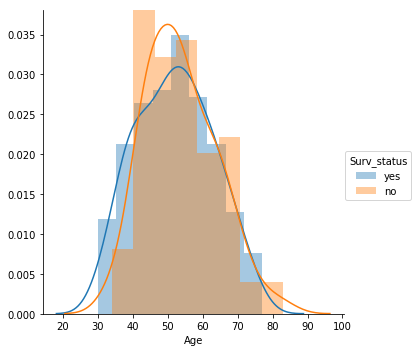

In [11]:
sns.FacetGrid(Haberman,hue='Surv_status',size=5)\
.map(sns.distplot,'Age')\
.add_legend()
plt.show()

More number of patients died in the age of above 40.
If age is less than 40 then Survival probability is high.

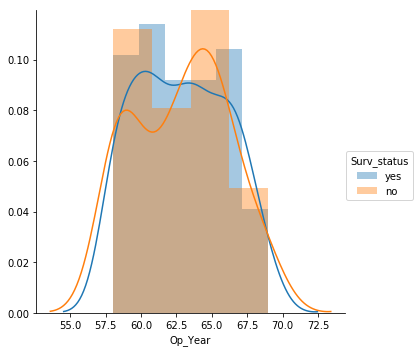

In [3]:
sns.FacetGrid(Haberman,hue='Surv_status',size=5)\
.map(sns.distplot,'Op_Year')\
.add_legend()
plt.show()

More number of operations done between year 60 to 66.

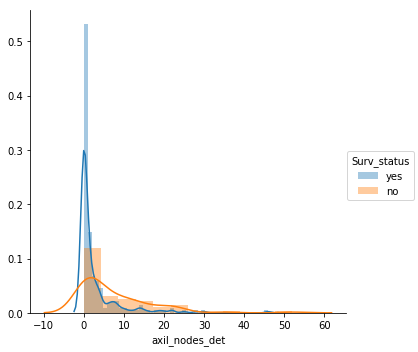

In [13]:
sns.FacetGrid(Haberman,hue="Surv_status",size=5)\
.map(sns.distplot,'axil_nodes_det')\
.add_legend()
plt.show()

If the detected nodes count is 0.The probability of survival is high.

# CDF

Cummulative Density Function is the probability of the x is the probablity that x will take a value less than or equal to x.
CDF is the the sum of PDF's upto x.
if integrate the PDF then we get CDF.
if differentiate the CDF then we get PDF.

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


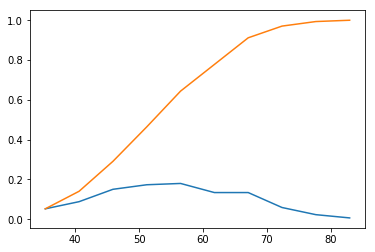

In [56]:
counts, bin_edges = np.histogram(Haberman['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


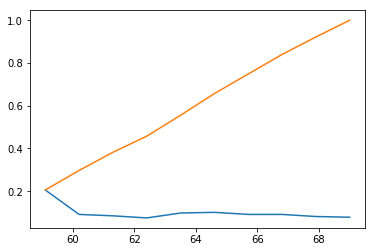

In [47]:
counts, bin_edges = np.histogram(Haberman['Op_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


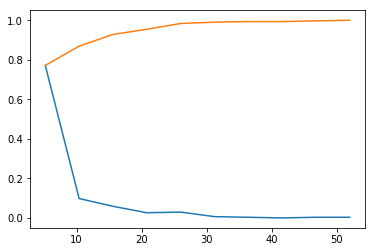

In [48]:
counts, bin_edges = np.histogram(Haberman['axil_nodes_det'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

# Observations:
# 1.80% of the patients are below 65 years.
# 2.90% of the operations done before the year 67(1967)
# 3.83% of patients having axil_nodes_det is less than 10.

# Box Plots

Box plots uses the concepts of Median,Percentile,Quantile
Box plots represents the 25% percentile,50% percentile(Median) and 75% percentile as a box and repesents the whiskers with 1.5*IQR above and below the Box.
Here IQR=75% percentile -25% percentile

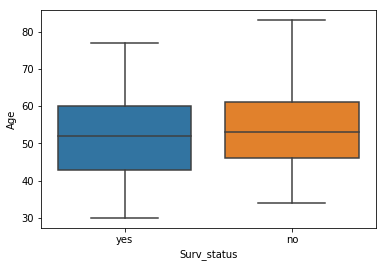

In [66]:
sns.boxplot(x='Surv_status',y='Age', data=Haberman)
plt.show()

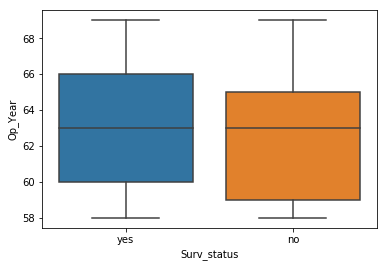

In [67]:
sns.boxplot(x='Surv_status',y='Op_Year',data=Haberman)
plt.show()

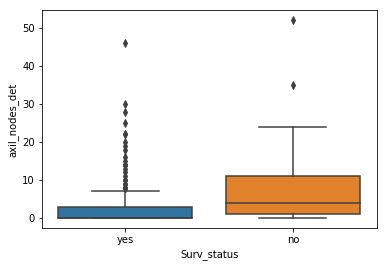

In [68]:
sns.boxplot(x='Surv_status',y='axil_nodes_det',data=Haberman)
plt.show()

# observations:
1.if the axil_nodes_det is less than or equal to 0.The survival_Status of patient is yes.
2.if the axil_nodes_det found is higher The survival of patient is no.

# Violin Plots:
Violin Plots are the combination of both the Box plots and Pdf.

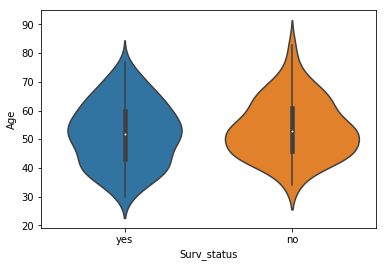

In [70]:
sns.violinplot(x="Surv_status", y="Age", data=Haberman, size=5)
plt.show()

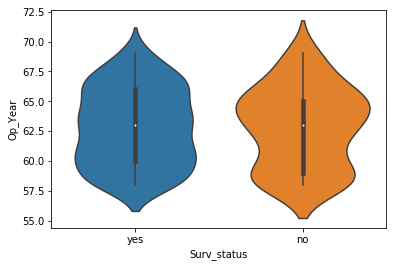

In [72]:
sns.violinplot(x="Surv_status",y="Op_Year",data=Haberman,size=5)
plt.show()

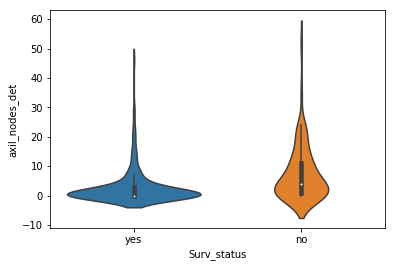

In [74]:
sns.violinplot(x="Surv_status",y="axil_nodes_det",data=Haberman,size=5)
plt.show()

# observations:
1.25% of the operations Surv_status is yes which are done after 1966.
2.75% of the operations Surv_status is no which are done befor 1958.
3.The more number of patients having axil_nodes_det is 0 are survived.

# Bi-variate analysis
In Bi-variate analysis we will find the relationships and importance of the features using pairplots and scatter plots of the features.

ScatterPlot between axil_nodes_det ade Op_Year:

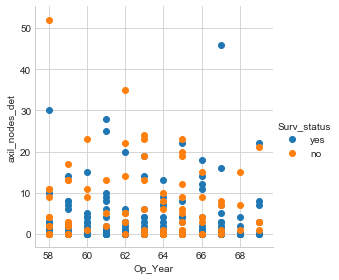

In [77]:
sns.set_style("whitegrid");
sns.FacetGrid(Haberman, hue="Surv_status", size=4) \
   .map(plt.scatter, "Op_Year", "axil_nodes_det") \
   .add_legend();
plt.show();


In this scatterplot we are unable to divide the classes linearly,The two resions are overlapped.
In the year 1961 more operations are successful,in the year 1965 more operations are failure

# Pair Plots
Pair plots are the Scatter Plots Between features of the data.

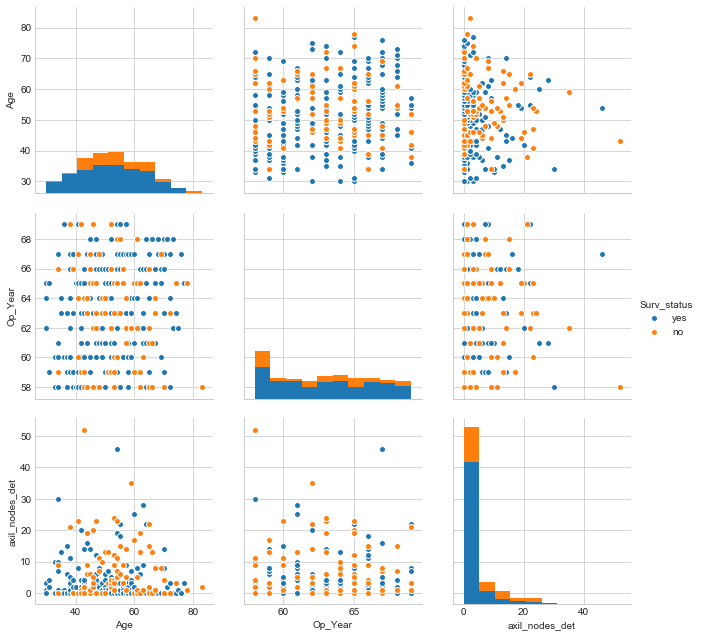

In [78]:
sns.set_style("whitegrid");
sns.pairplot(Haberman, hue="Surv_status", size=3);
plt.show()

# Observations:
1.Many patients are having axil_nodes_det is less than 10
2.if age is greater than 40,even having 1 axil_nodes_det also more likely to die.
3.All the pair plots are not linearly separable and having overlapping regions.
4.The pairplot between Op_year and axil_nodes_det is somewhat better than other plots.
5.So axil_nodes_det is the Most important featur among all the three features

# Conclusion:
This Dataset is not linearly separable.Its having overlapping region in every pair plot.
The most important features for classification is axil_nodes_det > age > Op_year